# Who's Faster -- Usain Bolt or Michael Phelps?

Usain Bolt and Michael Phelps are each regarded as the greatest athletes of their respective sports. But who was faster?

Does this question even make sense? How do we compare how fast Bolt runs with how fast Phelps swims? Although their times are measured in seconds, 1 second of running is not comparable to 1 second of swimming.

One way to compare _running_ and _swimming_ is to put the times on the same scale. To do this, we will compare Bolt and Phelps to their competitors at the 2008 Beijing Olympics, where Bolt set world records in the 100m and 200m events and Phelps won a record eight gold medals. Conveniently, both Bolt and Phelps had exactly 7 competitors in the finals of each event.

In [42]:
# read data from CSV files

import pandas as pd

df_bolt = pd.read_csv('data/bolt.csv')
df_phelps = pd.read_csv('data/phelps.csv')

## Part 1: Usain Bolt

One way to put variables on the same scale is to **standardize** them so that the mean is 0 and the standard deviation is 1.

To standardize a variable $x$, we subtract each value $x_i$ by the mean $\bar{x}$ and divide by the standard deviation:

$$
z_i \gets \frac{x_i - \bar{x}}{\mathrm{sd}(x)}
$$

### Question 1
Bolt competed in two individual events at the 2008 Olympics, the 100m and the 200m. Since they are different events, we should standardize each one separately.

To do this, we will first need the means and standard deviations of the times for each event. Use the split-apply-combine paradigm to calculate the means and standard deviations.

In [43]:
# for 100m events
mean_time_100m = df_bolt[df_bolt['Event'] == '2008 Olympics 100m']['Time'].mean()
standard_deviation_100m = df_bolt[df_bolt['Event'] == '2008 Olympics 100m']['Time'].std()
print(f"Mean time for 100m: {mean_time_100m:.2f} seconds")
print(f"Standard deviation for 100m: {standard_deviation_100m:.2f} seconds")

Mean time for 100m: 9.92 seconds
Standard deviation for 100m: 0.11 seconds


In [44]:
# for 200m events
mean_time_200m = df_bolt[df_bolt['Event'] == '2008 Olympics 200m']['Time'].mean()
standard_deviation_200m = df_bolt[df_bolt['Event'] == '2008 Olympics 200m']['Time'].std()
print(f"The mean time for 200m: {mean_time_200m:.2f} seconds")
print(f"The standard deviation for 200m: {standard_deviation_200m:.2f} seconds")

The mean time for 200m: 20.03 seconds
The standard deviation for 200m: 0.39 seconds


### Question 2
Now, using the means and standard deviations (for each event) that you calculated above, standardize the times for each event. Interpret the result; on which event was Bolt more impresssive?

(Hint: One efficient way to do this is to create a series of the times, where the index consists of the event and the athlete. Then, you should be able to use arithmetic operations with the means and standard deviations you calculated above.)

In [ ]:
# standardize the times for Bolt's 100m and 200m events (z-scores)
# create a new column 'Standardized Time' in df_bolt
# where the standardized time is calculated as (time - mean) / standard deviation
bolt_events_stats = {
    '2008 Olympics 100m': {
        'mean': mean_time_100m,
        'std_dev': standard_deviation_100m
    },
    '2008 Olympics 200m': {
        'mean': mean_time_200m,
        'std_dev': standard_deviation_200m
    }
}

def standardize_time(row):
    event = row['Event']
    if event in bolt_events_stats:
        mean = bolt_events_stats[event]['mean']
        std_dev = bolt_events_stats[event]['std_dev']
        return (row['Time'] - mean) / std_dev
    return None

# Apply the standardization function to each row in the DataFrame
df_bolt['Standardized Time'] = df_bolt.apply(standardize_time, axis=1)
df_bolt
# Conclusion: the 100m event was more impressive than the 200m event

,Event,Rank,Lane,Athlete,Nation,Time,Standardized Time
0,2008 Olympics 100m,1,4,Usain Bolt,Jamaica,9.69,-2.208926
1,2008 Olympics 100m,2,5,Richard Thompson,Trinidad and Tobago,9.89,-0.308775
2,2008 Olympics 100m,3,6,Walter Dix,United States,9.91,-0.118759
3,2008 Olympics 100m,4,9,Churandy Martina,Netherlands Antilles,9.93,0.071256
4,2008 Olympics 100m,5,7,Asafa Powell,Jamaica,9.95,0.261271
5,2008 Olympics 100m,6,2,Michael Frater,Jamaica,9.97,0.451286
6,2008 Olympics 100m,7,8,Marc Burns,Trinidad and Tobago,10.01,0.831316
7,2008 Olympics 100m,8,3,Darvis Patton,United States,10.03,1.021331
8,2008 Olympics 200m,1,5,Usain Bolt,Jamaica,19.30,-1.854401
9,2008 Olympics 200m,2,4,Shawn Crawford,United States,19.96,-0.172058


### Question 2.5

How could you check that you standardized the times correctly?

In [46]:
### 

### Question 3
Make a visualization comparing the standardized times across the two events.

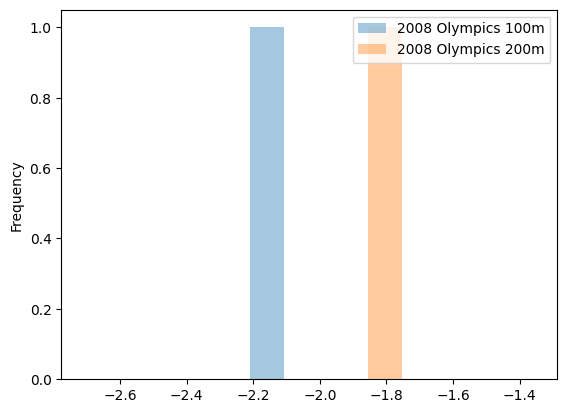

In [57]:
# vizualize the standardized times
axes_bolt = df_bolt.query('Athlete == "Usain Bolt"').groupby('Event')['Standardized Time'].plot.hist(legend=True, alpha=0.4)

## Part 2: Michael Phelps

Now let's standardize Michael Phelps's times in 5 individual events and compare them to Usain Bolt's times.

### Question 4
Unfortunately, the data for Phelps isn't nearly as clean. The times are stored in `minutes:seconds` format. Create a new column in the `DataFrame` with the time in seconds.

(Hint: One way to do this is to use `.str.split(":")` and process the result.)

In [48]:
# convert the 'Time' column in df_phelps to seconds
df_phelps['Time in Seconds'] = df_phelps['Time'].str.split(":").apply(lambda x: int(x[0]) * 60 + float(x[1]))
df_phelps

,Event,Rank,Lane,Athlete,Nation,Time,Time in Seconds
0,2008 Olympics 200m freestyle,1,6,Michael Phelps,United States,1:42.96,102.96
1,2008 Olympics 200m freestyle,2,5,Park Tae-Hwan,South Korea,1:44.85,104.85
2,2008 Olympics 200m freestyle,3,4,Peter Vanderkaay,United States,1:45.14,105.14
3,2008 Olympics 200m freestyle,4,3,Jean Basson,South Africa,1:45.97,105.97
4,2008 Olympics 200m freestyle,5,2,Paul Biedermann,Germany,1:46.00,106.00
5,2008 Olympics 200m freestyle,6,1,Dominik Meichtry,Switzerland,1:46.95,106.95
6,2008 Olympics 200m freestyle,7,7,Yoshihiro Okumura,Japan,1:47.14,107.14
7,2008 Olympics 200m freestyle,8,8,Robbie Renwick,Great Britain,1:47.47,107.47
8,2008 Olympics 100m butterfly,1,5,Michael Phelps,United States,0:50.58,50.58
9,2008 Olympics 100m butterfly,2,4,Milorad Čavić,Serbia,0:50.59,50.59


### Question 5

Now, standardize the times for each event. Check your answer. How does Phelps compare with Bolt?

In [51]:
# get the mean and standard deviation for Phelps' each event
mean_200m_freestyle = df_phelps[df_phelps['Event'] == '2008 Olympics 200m freestyle']['Time in Seconds'].mean()
std_dev_200m_freestyle = df_phelps[df_phelps['Event'] == '2008 Olympics 200m freestyle']['Time in Seconds'].std()

mean_100m_butterfly = df_phelps[df_phelps['Event'] == '2008 Olympics 100m butterfly']['Time in Seconds'].mean()
std_dev_100m_butterfly = df_phelps[df_phelps['Event'] == '2008 Olympics 100m butterfly']['Time in Seconds'].std()

mean_200m_butterfly = df_phelps[df_phelps['Event'] == '2008 Olympics 200m butterfly']['Time in Seconds'].mean()
std_dev_200m_butterfly = df_phelps[df_phelps['Event'] == '2008 Olympics 200m butterfly']['Time in Seconds'].std()

mean_200m_medley = df_phelps[df_phelps['Event'] == '2008 Olympics 200m medley']['Time in Seconds'].mean()
std_dev_200m_medley = df_phelps[df_phelps['Event'] == '2008 Olympics 200m medley']['Time in Seconds'].std()

mean_400m_medley = df_phelps[df_phelps['Event'] == '2008 Olympics 400m medley']['Time in Seconds'].mean()
std_dev_400m_medley = df_phelps[df_phelps['Event'] == '2008 Olympics 400m medley']['Time in Seconds'].std()

In [52]:
# set up a dictionary to hold the statistics
phelps_event_stats = {
    '2008 Olympics 200m freestyle': {
        'mean': mean_200m_freestyle,
        'std_dev': std_dev_200m_freestyle
    },
    '2008 Olympics 100m butterfly': {
        'mean': mean_100m_butterfly,
        'std_dev': std_dev_100m_butterfly
    },
    '2008 Olympics 200m butterfly': {
        'mean': mean_200m_butterfly,
        'std_dev': std_dev_200m_butterfly
    },
    '2008 Olympics 200m medley': {
        'mean': mean_200m_medley,
        'std_dev': std_dev_200m_medley
    },
    '2008 Olympics 400m medley': {
        'mean': mean_400m_medley,
        'std_dev': std_dev_400m_medley
    }
}

def standardize_phelps_time(row):
    event = row['Event']
    if event in phelps_event_stats:
        mean = phelps_event_stats[event]['mean']
        std_dev = phelps_event_stats[event]['std_dev']
        return (row['Time in Seconds'] - mean) / std_dev
    return None

df_phelps['Standardized Time'] = df_phelps.apply(standardize_phelps_time, axis=1)
df_phelps

,Event,Rank,Lane,Athlete,Nation,Time,Time in Seconds,Standardized Time
0,2008 Olympics 200m freestyle,1,6,Michael Phelps,United States,1:42.96,102.96,-1.922794
1,2008 Olympics 200m freestyle,2,5,Park Tae-Hwan,South Korea,1:44.85,104.85,-0.647678
2,2008 Olympics 200m freestyle,3,4,Peter Vanderkaay,United States,1:45.14,105.14,-0.452025
3,2008 Olympics 200m freestyle,4,3,Jean Basson,South Africa,1:45.97,105.97,0.107946
4,2008 Olympics 200m freestyle,5,2,Paul Biedermann,Germany,1:46.00,106.00,0.128186
5,2008 Olympics 200m freestyle,6,1,Dominik Meichtry,Switzerland,1:46.95,106.95,0.769117
6,2008 Olympics 200m freestyle,7,7,Yoshihiro Okumura,Japan,1:47.14,107.14,0.897304
7,2008 Olympics 200m freestyle,8,8,Robbie Renwick,Great Britain,1:47.47,107.47,1.119943
8,2008 Olympics 100m butterfly,1,5,Michael Phelps,United States,0:50.58,50.58,-1.398947
9,2008 Olympics 100m butterfly,2,4,Milorad Čavić,Serbia,0:50.59,50.59,-1.377425


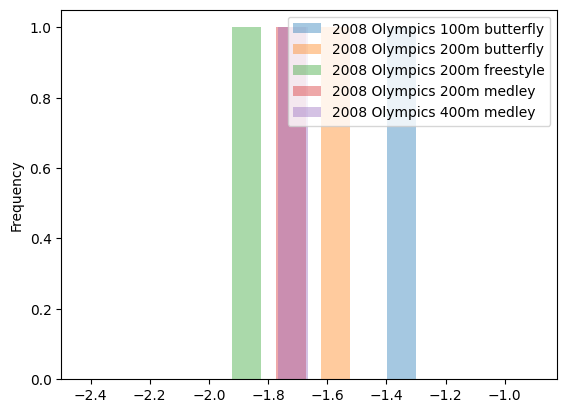

In [56]:
# vizualize the standardized times
axes_phelps = df_phelps.query('Athlete == "Michael Phelps"').groupby('Event')['Standardized Time'].plot.hist(legend=True, alpha=0.4)

Conclusion: Bolt is a crazy man